# Extract few SED and compute magnitudes

- Author Sylvie Dagoret-Campagne
- creation date Aril 19th 2018
Process SED with galactic extinction


In [301]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [302]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
cmap = cm.jet
%matplotlib inline

In [303]:
import os
import sys

In [304]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [305]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [306]:
cfht_transmissionfile="./all_SNLS_transm.csv"

In [307]:
sys.path.append('./snlsphotometry')
sys.path.append('../DESCDec2017/pysynphotsed')

In [308]:
!ls ../DESCDEC2017

CheckSEDmodels  Impact_ozone    README.md       lsstphotometry  tests_aerosols
Impact_Airmass  Impact_pwv      SEDPopulations  pysynphotsed    tests_ozone
Impact_aerosols LSSTFiltersKG   libradtransim   test_pwv


In [309]:
import libSNLSPhotometry as photo
import libCFHTFilters as cfht
#import libpysynphotsed as sed
import libpysynphotgridsed as sed

In [310]:
import astropy
import astropy.units as u
from astropy.io import fits

In [311]:
import pysynphot as S
S.primary_area=1.02e5
S.binning=1.

# CFHT Telescope

In [312]:
CFHT_COLL_SURF=np.pi/4.*(3.6*u.m)**2/(u.cm)**2  # LSST collectif surface
WLMIN=3000.
WLMAX=11000.

In [313]:
print CFHT_COLL_SURF

10.1787601976 m2 / cm2


In [314]:
NBINS=int(WLMAX-WLMIN)
BinWidth=(WLMAX-WLMIN)/float(NBINS)
WL=np.linspace(WLMIN,WLMAX,NBINS)

In [315]:
CFHT_COLL_SURF.decompose()

<Quantity 101787.6019763093>

In [316]:
S.refs.setref(area=CFHT_COLL_SURF.decompose(), waveset=None)

In [317]:
S.refs.set_default_waveset(minwave=WLMIN, maxwave=WLMIN, num=NBINS, delta=1, log=False)

In [318]:
S.refs.showref()

thermtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/tae17277m_tmt.fits
   waveset: Min: 3000.0, Max: 3000.0, Num: None, Delta: 1, Log: False
 comptable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/16n1832tm_tmc.fits
graphtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/14l1632sm_tmg.fits
      area: 101787.601976


# Number of independant catalog

In [319]:
file_sed_fits='sedgrid_phoenixmodels_good.fits'
#file_sed_fits='sedgrid_phoenixmodels_extinct_03.fits'
#file_sed_fits='sedgrid_phoenixmodels_extinct_10.fits'
#file_sed_fits='sedgrid_phoenixmodels_extinct_50.fits'

In [320]:
!ls *.fits


sedgrid_phoenixmodels.fits      sedgrid_phoenixmodels_good.fits


In [321]:
all_sed_collection= []
all_sedmodels_tag=[]

In [322]:
Flag_PHOENIX=True
   
if Flag_PHOENIX:
    all_sed,all_indexes=sed.FitsToPySynphotSED(file_sed_fits)
    all_sed_collection.append(all_sed)
    all_sedmodels_tag.append('phoenix')
        

Warning, 33 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 40 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 24 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 14 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 13 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 31 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 24 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 54 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 7 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 36 of 7000 bins contained negative 

Warning, 5 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 26 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 48 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 57 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 11 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 8 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 16 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 34 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 47 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 11 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 22 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 14 of 7000 bins contained negative

Warning, 4 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 14 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 4 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 7 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 4 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 20 of 7000 bins contained negative fluxes; they have been set to zero.
Warning, 10 of 7000 bins contained negative fluxes

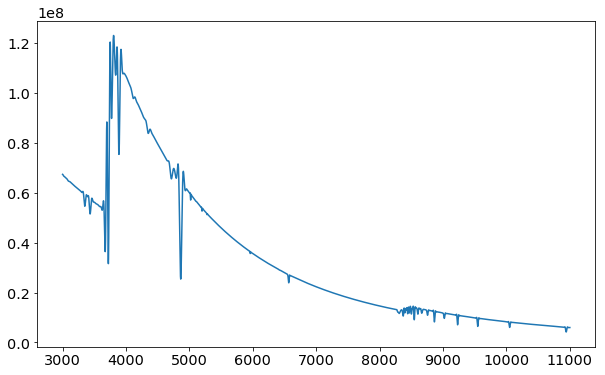

In [379]:
idx=2707
plt.plot(all_sed[idx].wave,all_sed[idx].flux)

In [382]:
sed_out=np.array([all_sed[idx].wave,all_sed[idx].flux])

In [386]:
sed_out=sed_out.T

In [387]:
sed_out.shape

(7000, 2)

In [388]:
np.savetxt('sed_2707.txt',sed_out)

In [324]:
NBCATALOGS=len(all_sedmodels_tag)

In [325]:
NBCATALOGS

1

In [326]:
print len(all_indexes)

11102


In [327]:
random_vec=np.random.rand(len(all_indexes))

In [328]:
select_flag=random_vec>0.9995
select_flag=random_vec<0.0005

In [329]:
print select_flag

[False False False ..., False False False]


In [330]:
np.sum(select_flag==True)

5

In [331]:
sel_idx=np.where(select_flag==True)[0]

In [332]:
all_indexes=sel_idx

In [333]:
print all_indexes

[  978  2266  2797  3853 10386]


In [334]:
sel_sed = []
for idx in np.arange(len(all_sed)):
    if idx in all_indexes:
        sel_sed.append(all_sed[idx])

In [335]:
len(sel_sed)

5

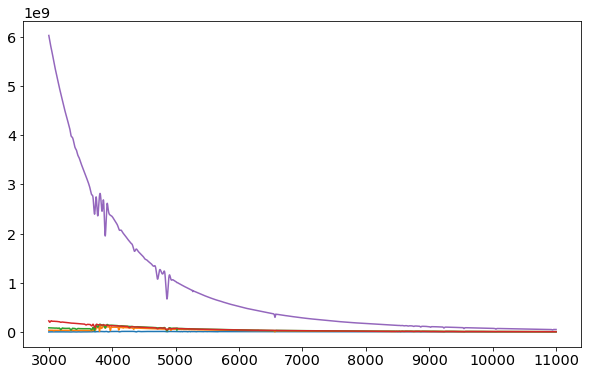

In [336]:
for idx in np.arange(len(sel_sed)):
    plt.plot(sel_sed[idx].wave,sel_sed[idx].flux)

In [337]:
all_sed_collection= []
all_sedmodels_tag=[]
all_sed_collection.append(sel_sed)
all_sedmodels_tag.append('phoenix')

In [418]:
all_sed_collection= []
all_sedmodels_tag=[]
all_sed_collection.append([all_sed[2707]])
all_sedmodels_tag.append('phoenix')
all_indexes=np.array([2707])

# Retrieve Filters

In [419]:
bp_u,bp_g,bp_r,bp_i,bp_z=cfht.GetAllCFHTBands(cfht_transmissionfile)

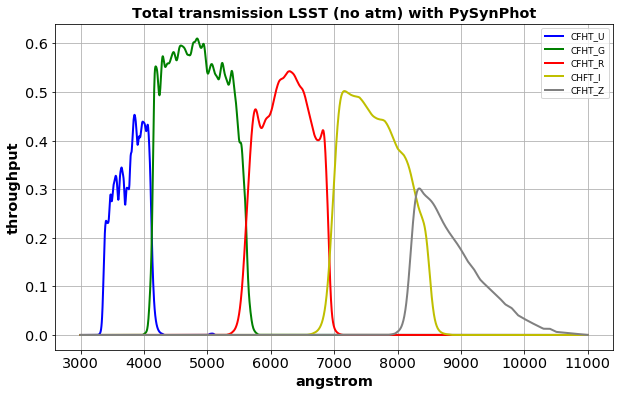

In [420]:
cfht.PlotAllCFHTBands(bp_u,bp_g,bp_r,bp_i,bp_z)

# Create LSST Detector

In [421]:
cfhtdetector=photo.SNLSTransmission('cfhtel')

In [422]:
cfhtdetector.fill_det_allbands([bp_u,bp_g,bp_r,bp_i,bp_z])

# Get CFHT Atmosphere

In [423]:
photo_atm=photo.Atmosphere('SNLS atmosphere')

In [424]:
df=pd.read_csv(cfht_transmissionfile)
df.sort_index(axis=0,ascending=True,inplace=True)     
wl_atm=df["lambda"]
tr_atm=df["atm"]
wl_atm=np.array(wl_atm)   
tr_atm=np.array(tr_atm)
photo_atm.fill_array(wl_atm)        
photo_atm.fill_array(tr_atm)  

In [425]:
theatmosph=photo_atm.get_array()

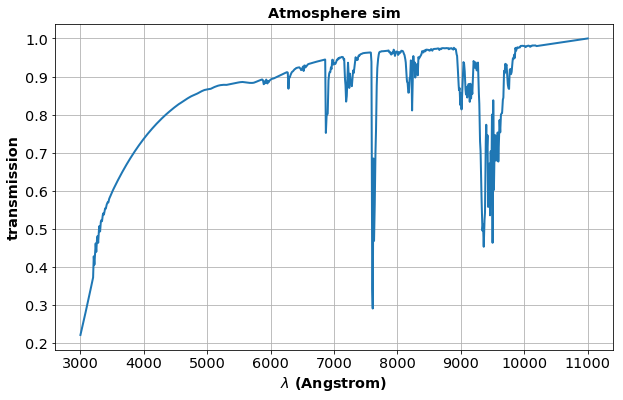

In [426]:
photo_atm.plot_pys_bp()

In [427]:
all_bp_atm=photo_atm.get_pys_pb()

In [428]:
cfhtdetector.fill_atm_allevents(all_bp_atm)

In [429]:
all_transmissions=cfhtdetector.make_transmissions()

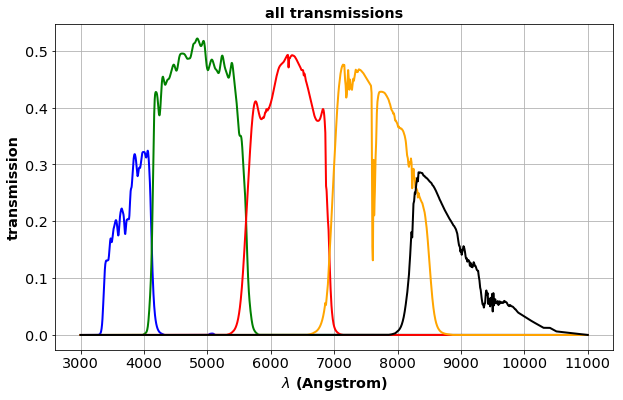

In [430]:
cfhtdetector.plot_transmissions()

# Calculation of all Observations for each SED colors

In [431]:
all_observations_collection = []
all_observations_zeropt_collection = []

In [432]:
np.arange(NBCATALOGS)

array([0])

In [433]:
for id_model in np.arange(NBCATALOGS):
    the_obs_name="SNLS_models-{}".format(all_sedmodels_tag[id_model])  
    print id_model, the_obs_name
    the_observation=photo.SNLSObservation(the_obs_name)            # create a set of observation 
    the_observation.fill_sed(all_sed_collection[id_model])         # get the SED from the SED model model
    the_observation.fill_transmission(all_transmissions)           # provide LSST Trroughput transmission
    the_observation.make_observations()                            # start calculations 
    the_observation.make_samplobservations()
    the_observation.compute_counts()
    the_observation.compute_magnitude()
    the_observation.compute_colors()
    all_observations_collection.append(the_observation)

0 SNLS_models-phoenix
((ATM_1 * CFHT_U)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((ATM_1 * CFHT_G)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((ATM_1 * CFHT_R)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((ATM_1 * CHFT_I)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
((ATM_1 * CFHT_Z)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


# Check

In [434]:
len(all_observations_collection)

1

In [435]:
ModelSelect=0
ObjectSelect=0

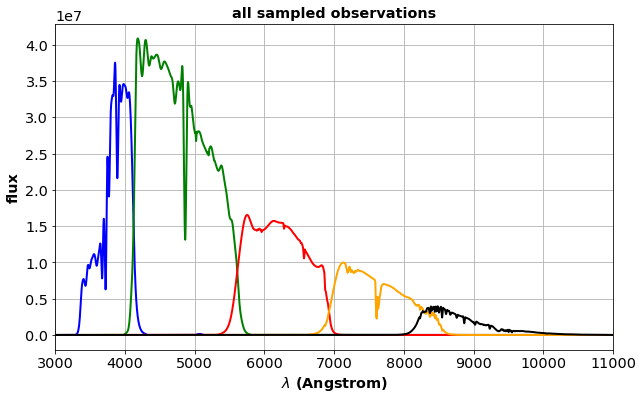

In [436]:
all_observations_collection[ModelSelect].plot_samplobservations(ObjectSelect)

# Work with magnitudes

In [437]:
all_magnitudes=np.array(all_observations_collection[ModelSelect].get_magnitudes())

In [438]:
print len(all_indexes)

1


In [439]:
print len(all_magnitudes)

1


In [440]:
type(all_magnitudes)

numpy.ndarray

In [441]:
all_magnitudes0=all_magnitudes[:,0,:]

In [442]:
all_magnitudes0.shape

(1, 5)

In [443]:
dfm=pd.DataFrame(data=all_magnitudes0,columns=["u","g","r","i","z"])

In [444]:
dfm.head()

,u,g,r,i,z
0,-66.236451,-67.604219,-66.886165,-66.49156,-65.444584


In [445]:
dfm["idxcat"]=all_indexes
dfm=dfm.reindex(['idxcat','u','g','r','i','z'], axis=1)

In [446]:
dfm.head()

,idxcat,u,g,r,i,z
0,2707,-66.236451,-67.604219,-66.886165,-66.49156,-65.444584


In [447]:
dfm.to_csv("phoenix_snlsmagnit_Noextinct_sample.csv")

# Work with colors

In [448]:
all_colors=all_observations_collection[ModelSelect].get_colors()

In [449]:
all_colors.shape

(1, 1, 4)

1 1


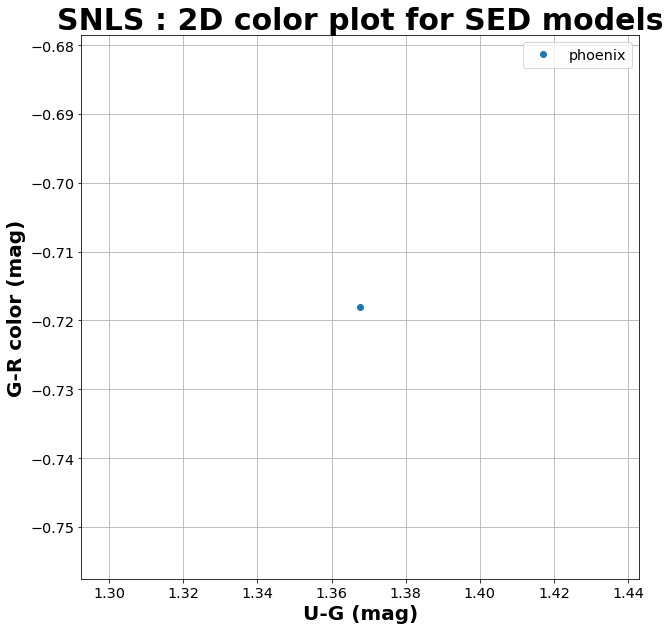

In [450]:
plt.figure(figsize=(10,10))
for id_model in np.arange(NBCATALOGS):
    all_colors=all_observations_collection[id_model].get_colors()
    c1=all_colors[:,0,0]
    c2=all_colors[:,0,1]
    print len(c1),len(c2)
    plt.plot(c1,c2,'o',label=all_sedmodels_tag[id_model])
    
plt.grid()

xtitle='U-G (mag)'
ytitle='G-R color (mag)'
title='SNLS : 2D color plot for SED models'
plt.xlabel(xtitle,fontsize=20,weight='bold')
plt.ylabel(ytitle,fontsize=20,weight='bold')        
plt.title(title,fontsize=30,weight='bold')    
plt.legend()    
    

In [451]:
id_phoenix_model=0
all_colors=all_observations_collection[id_phoenix_model].get_colors()
c1=all_colors[:,0,0]
c2=all_colors[:,0,1]
c3=all_colors[:,0,2]
c4=all_colors[:,0,3]

In [452]:
df=pd.DataFrame({'u-g':c1,'g-r':c2,'r-i':c3,'i-z':c4})

In [453]:
df = df.reindex(['u-g','g-r','r-i','i-z'], axis=1)
#df = df.reindex(['u-g','g-r','r-i','i-z'], axis=1)
#df = df.reindex_axis(['u-g','g-r','r-i','i-z'], axis=1)

In [454]:
df.head()

,u-g,g-r,r-i,i-z
0,1.367768,-0.718054,-0.394605,-1.046976


In [455]:
df.to_csv("phoenix_snlscol_Noextinct_sample.csv")